# Exploratory Data Analysis Project

#### There's a story behind your numbers. Visualizing data brings them to life.


Visualizing data is effective when done right. We define right when the data visualizations have served its purpose.We know we are on right path when people can interpret our visualization by asking more questions on the information displayed versus how or what is displayed.    
Exploratory Data Analysis is one of the techniques to perform data visualization. It refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

After all the introduction, lets get to work. In this notebook, I will try to apply EDA on the "motor vehicle theft" dataset, maintained by the Chicago Police. It records various cases regarding act of stealing, or attempting to steal, a car. I shall try to analyze the data and capture some insights from it, like a detective XD.

## Setup
For the preparations lets first import the necessary libraries and load the files needed for our EDA

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

We have already read the `Chicago_Crime_Detective` dataset in the `DataCleaning.ipynb` notebook. We have cleaned the data and saved it as `cleandata.csv` file. We shall be using this file now.

In [2]:
df = pd.read_csv("cleandata.csv", index_col=0)
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,DayOfWeek
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,0
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,0
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,0
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,0
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,0


In [3]:
df.shape

(191641, 11)

In [4]:
print(df.dtypes)

ID                      int64
Date                   object
LocationDescription    object
Arrest                   bool
Domestic                 bool
Beat                    int64
District                int64
CommunityArea           int64
Year                    int64
Month                   int64
DayOfWeek               int64
dtype: object


## Segregation of Data

The data can be divided into two broad categories. This will make our analysis easier.
### Categorical Data
Categorical data represents characteristics. Therefore it can represent things like a person’s gender, language etc. Categorical data can also take on numerical values (Example: 1 for female and 0 for male). Note that those numbers don’t have mathematical meaning.
### Numerical Data
Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data,numerical data is always collected in number form. Numerical data differentiates itself with other number form data types with its ability to carry out arithmetic operations with these numbers.


## Other Ways for Segregation
In our dataset there are as such no columns representing numerical data except the `Date` column. But we can generate numerical data from the table as we dive deeper into the dataset. Rest all columns have categorical data. So there is not much need to segregate the data.
But we can divide the columns in the following three categories:
### Location Data
These columns describe the location of the theft. These include the `LocationDescription`, `Domestic`, `Beat`, `District` and `CommunityArea`.
### Time Data
These columns describe the time when the theft has occured. These include `Date`, `Year`, `Month` and `DayofWeek`.
### Other
These include the `ID` and `Arrest` columns which do not come under the above two categories.

## Location Analysis


In [5]:
df_categorical = df.loc[:, ['LocationDescription', 'Domestic', 'Beat', 'District', 'CommunityArea']]

In [6]:
df_categorical.nunique()


LocationDescription     78
Domestic                 2
Beat                   300
District                27
CommunityArea           79
dtype: int64

As we have already seen that the `District` and `CommunityArea` columns hava a lot of missing values. We shall keep that in mind while performing the analysis. 
Lets now start by answering various question.

### Which locations had the maximum number of thefts?

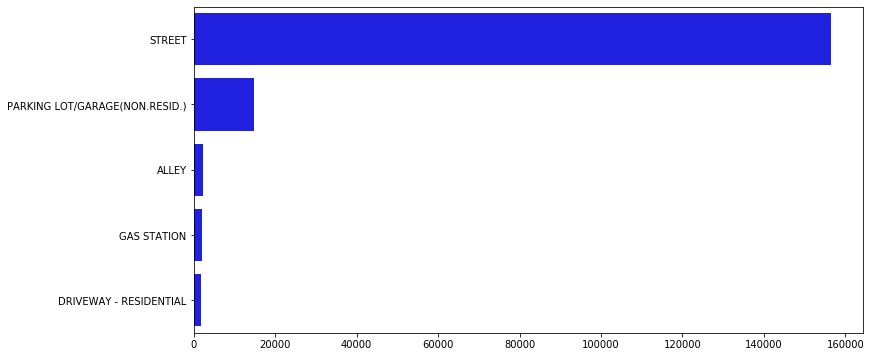

In [7]:

top_loc = df_categorical.LocationDescription.value_counts().drop(labels='OTHER').head(5)
plt.figure(figsize=(12,6))
sns.barplot(y=top_loc.index, x=top_loc.values, color="b")

As we can see the streets are far ahead in number of theft cases than any other location. Let us now compare the number of cases occuring on street with all other locations combined. We can see in the below plot that the number of thefts on streets greatly outnumber the number of thefts occurring elsewhere.

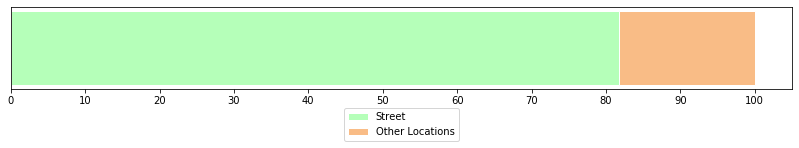

In [8]:
total=df_categorical.LocationDescription.count()
y1 = df_categorical[df_categorical.LocationDescription =='STREET'].LocationDescription.count()
y2 = df_categorical.shape[0]-int(y1)
[y1, y2]=map(lambda x: x/total*100,[y1,y2])
plt.figure(figsize=(14,1.5))
plt.barh([0], y1, color='#b5ffb9', edgecolor='white')
plt.barh([0], y2, color='#f9bc86', left=y1, edgecolor='white')
plt.legend(['Street', 'Other Locations'], loc='lower center', bbox_to_anchor=(0.5,-0.7))
# Turn off tick labels
plt.yticks([])
plt.xticks(range(0,101,10))
plt.show()

### What is District wise distribution of thefts?

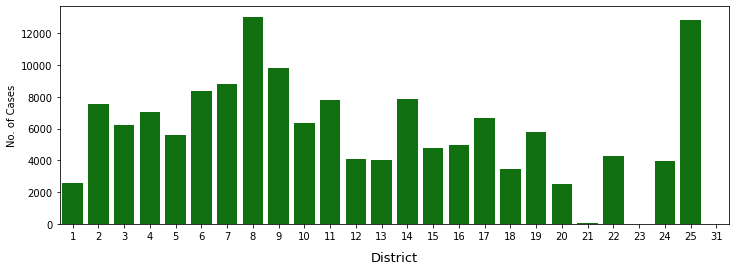

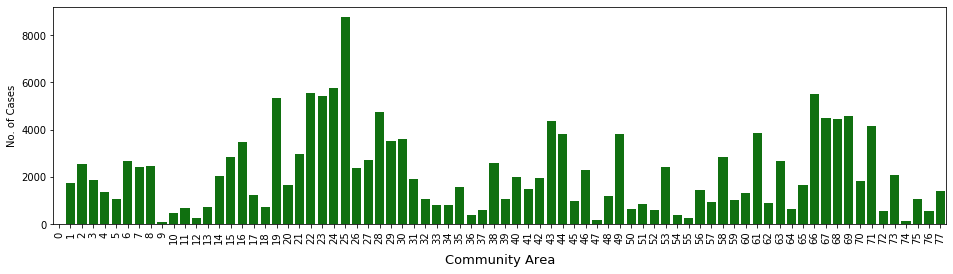

In [9]:
#District wise distribution of cases
districts = df_categorical.District.value_counts().sort_index()
districts.drop(labels=-1, inplace=True)
districts.sort_index(inplace=True)
plt.figure(figsize=(12,4))
sns.barplot(y=districts.values , x=districts.index, color='g')
plt.xlabel("District", labelpad=10, fontsize=13)
plt.ylabel("No. of Cases")
#Community Area wise distribution of cases
comarea = df_categorical.CommunityArea.dropna().value_counts()
comarea.drop(labels=-1, inplace=True)
plt.figure(figsize=(16,4))
sns.barplot(y=comarea.values , x=comarea.index, color='g')
plt.xticks(rotation=90)
plt.xlabel("Community Area", labelpad=10, fontsize=13)
plt.ylabel("No. of Cases")
plt.show()

As we can see that there were huge number of thefts reported in districts 8 and 25. These were the most unsafe place in the time period covered in this dataset. Also districts 21 and 23 were most safe places with negligible number of cases. The districts missing from the plot are the ones whose data was not available.

Also Community Area 25 has the highest number of reported cases.

### What was the proportion of domestic thefts?

In [10]:
tot = df_categorical.Domestic.count()
domestic_num = df_categorical.Domestic.value_counts()
domestic_num/tot*100

False    99.783449
True      0.216551
Name: Domestic, dtype: float64

As we can see that only 0.2% of all the cases were domestic ones. Now lets see their distribution Community area wise. This means that motor vehicles are not stolen from homes. Since this comprises such a low proportion of all the cases, we shall not do further analysis on it.

### What was region wise trend of people being arrested for such thefts?

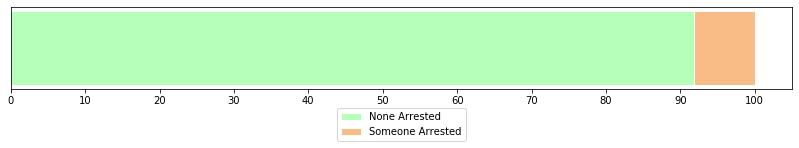

In [11]:
total=df.Arrest.count()
y1 = df.Arrest.sum()
y2 = total-int(y1)
[y2, y1]=map(lambda x: x/total*100,[y1,y2])
plt.figure(figsize=(14,1.5))
plt.barh([0], y1, color='#b5ffb9', edgecolor='white')
plt.barh([0], y2, color='#f9bc86', left=y1, edgecolor='white')
plt.legend(['None Arrested', 'Someone Arrested'], loc='lower center', bbox_to_anchor=(0.5,-0.7))
# Turn off tick labels
plt.xticks(range(0,101,10))
plt.yticks([])
plt.show()

So in more than 90% of cases no one was arrested by the police. This is very bad for the police and shows how unsafe the place is. Lets see this Beat-wise. Beat is the smallest geographical region recognized by the Chicago police.

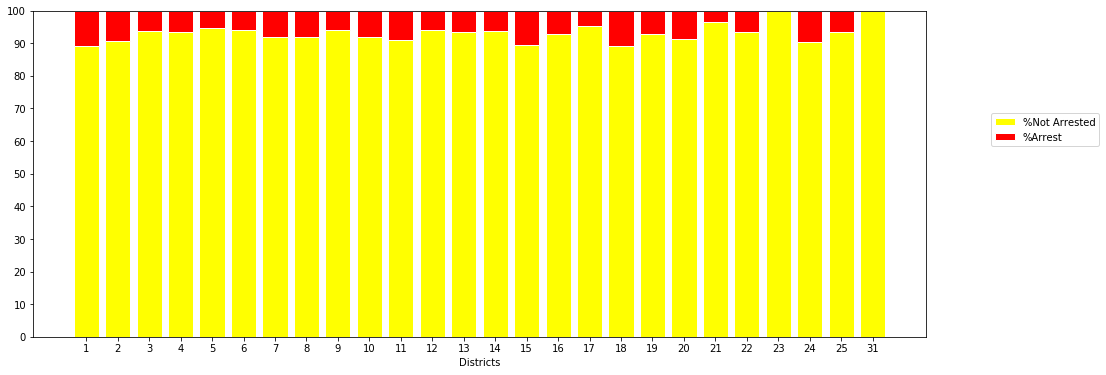

In [12]:
Arrest_prop = df.dropna(how='any')
plotdata = Arrest_prop.Arrest.groupby(Arrest_prop.District).value_counts()
Dist_index=[]
[Dist_index.append(x) for (x,y) in plotdata.index.to_list() if x not in Dist_index and x != -1]
falseval = [0 if (x,False) not in plotdata.index.to_list() else plotdata[(x,False)] for x in Dist_index]
trueval = [0 if (x,True) not in plotdata.index.to_list() else plotdata[(x,True)] for x in Dist_index]
r=list(range(len(trueval)))
totals = [i+j for i,j in zip(trueval,falseval)]
trueBars = [i / j * 100 for i,j in zip(trueval, totals)]
falseBars = [i / j * 100 for i,j in zip(falseval, totals)]
#Dist_index=[str(x).replace('.0','') for x in Dist_index]
barwidth = 0.8
plt.figure(figsize=(16,6))
plt.bar(r, falseBars, color='yellow', edgecolor='white', width=barwidth)
plt.bar(r, trueBars, bottom=falseBars, color='red', edgecolor='white', width=barwidth)
plt.xticks(r, Dist_index)
plt.yticks(range(0,101,10))
plt.xlabel("Districts")
plt.legend(['%Not Arrested', '%Arrest'], loc='upper right', bbox_to_anchor=(1.2,0.7))

plt.show()
 


## Time Analysis
Now lets begin with the time analysis of the data. Columns like `Date`, `Year`, `Month` and `DayOfWeek` give information regarding the time at which a particular theft occured.

### What is the trend in number of cases over the years?

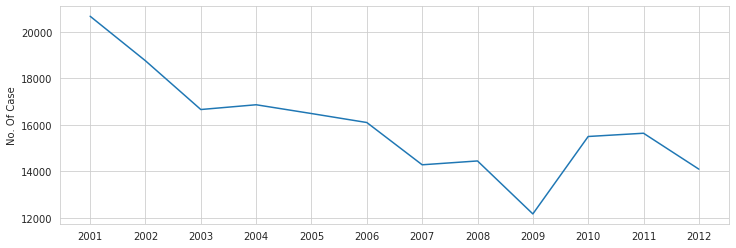

In [13]:
annualdata = df.Year.value_counts()
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
sns.lineplot(x=annualdata.index, y=annualdata.values)
plt.xticks(annualdata.index)
plt.ylabel('No. Of Case')
plt.show()

It is clearly visible that the number of cases are on a decline over the years. The police is really doing a good job!

### What are the most unsafe month and day of the week?

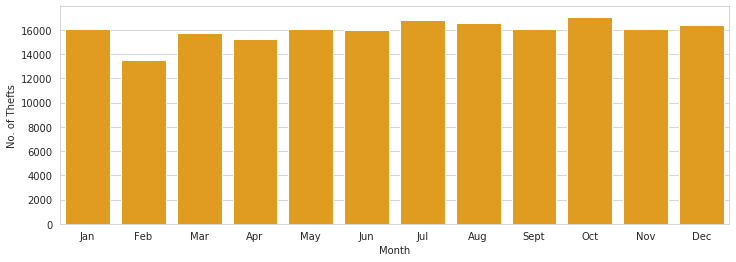

In [30]:
years = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept','Oct', 'Nov', 'Dec']
plt.figure(figsize=(12,4))
sns.set_style('whitegrid')
sns.countplot(df.Month, color='orange')
plt.ylabel('No. of Thefts')
plt.xticks(np.arange(0,12), years)
plt.show()

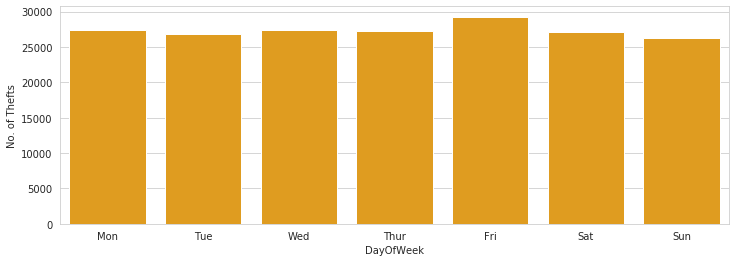

In [31]:
days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(12,4))
sns.set_style('whitegrid')
sns.countplot(x=df.DayOfWeek, color='orange')
plt.ylabel('No. of Thefts')
plt.xticks(np.arange(0,7), days)
plt.show()

As we can see that "October" is the most unsafe month as most number of thefts were reported during this month. Also it is adviced to take special care of your vehicles on "Friday"!

## Mixed Analysis
Let us now combine both the time and location data to do some in depth analysis and get more insights from the data.

### What is the trend in No. of Thefts over the years at most vulnerable locations?
Let us first find the top 10 locations for thefts. Then we shall do the plotting.

In [28]:
toplocation = df.LocationDescription.value_counts().drop(labels='OTHER').head(10)
toplocation = toplocation.index.to_list()
toplocation

['STREET',
 'PARKING LOT/GARAGE(NON.RESID.)',
 'ALLEY',
 'GAS STATION',
 'DRIVEWAY - RESIDENTIAL',
 'RESIDENTIAL YARD (FRONT/BACK)',
 'RESIDENCE',
 'RESIDENCE-GARAGE',
 'VACANT LOT/LAND',
 'VEHICLE NON-COMMERCIAL']

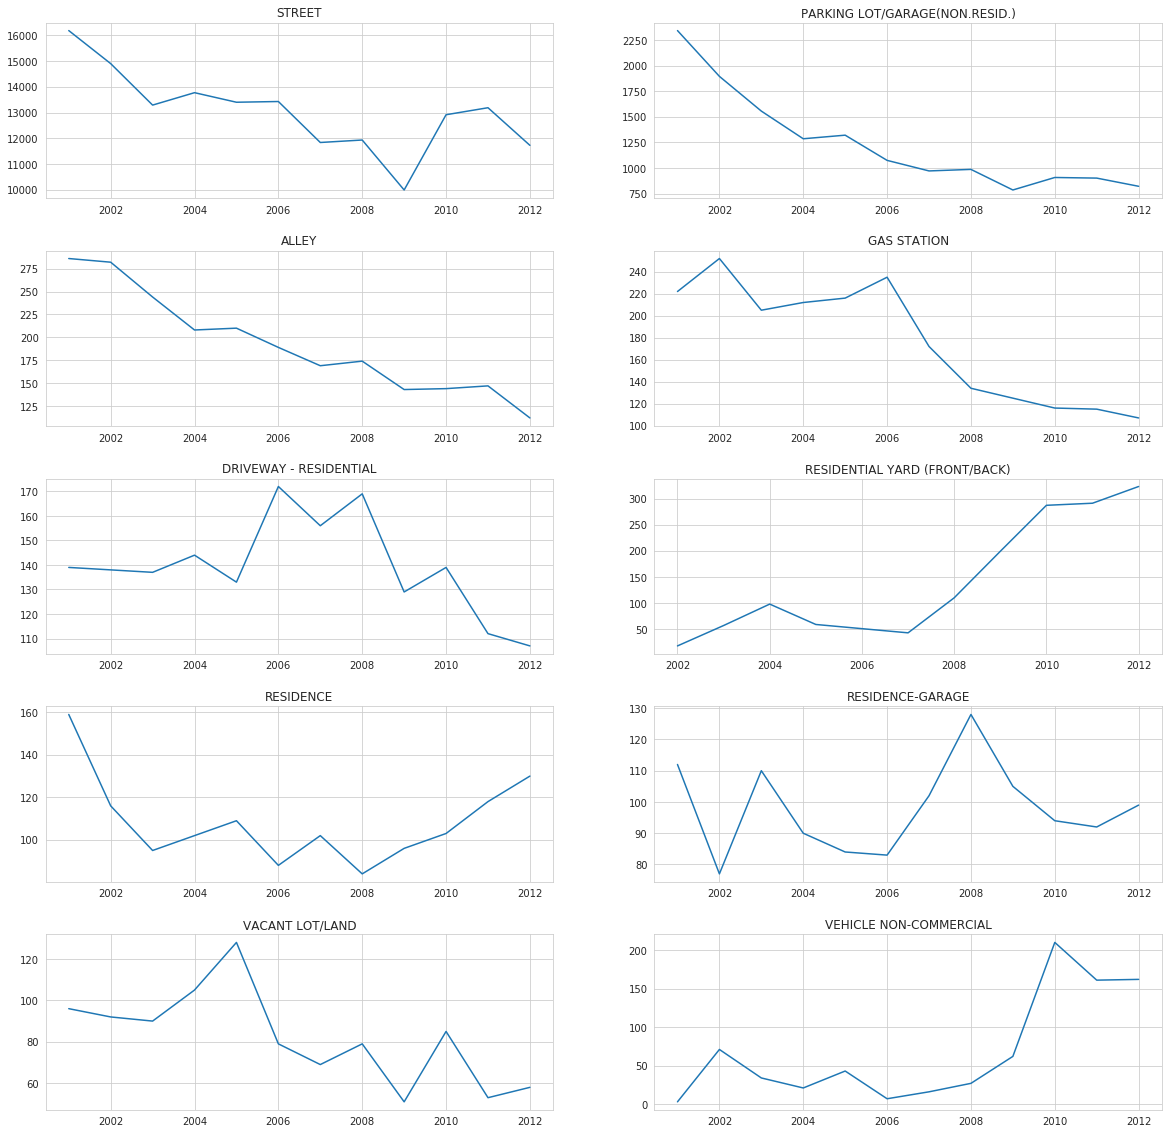

In [49]:
fig, ax = plt.subplots(round(len(toplocation) / 2), 2, figsize = (20, 20))
plt.subplots_adjust(hspace=0.3)
for i, ax in enumerate(fig.axes):
    y_data = df[df.LocationDescription== toplocation[i]].Year.value_counts()
    sns.lineplot(x=y_data.index, y=y_data.values, ax=ax)
    ax.title.set_text("{}".format(toplocation[i]))

We can draw many conclusions from these plots. `STREET`, `PARKING LOT/GARAGE(NON.RESID.)`, `ALLEY`, `GAS STATION`, `DRIVEWAY - RESIDENTIAL` and  `VACANT LOT/LAND` have seen an overall decrease in the number of thefts over the years. Whereas the number of cases increased for `VEHICLE NON-COMMERCIAL` and `RESIDENTIAL YARD(FRONT/BACK)`. For `RESIDENCE` and `RESIDENCE-GARAGE` the number of cases remained almost constant for the span of the data.
